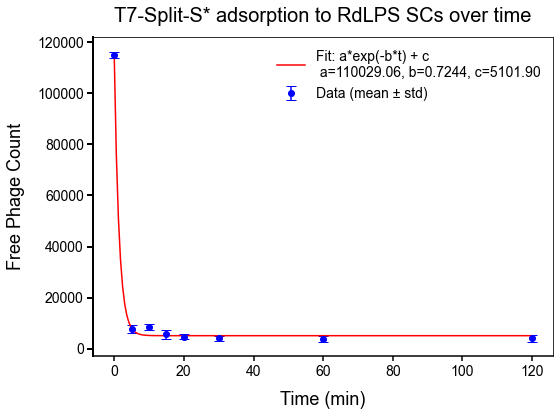

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from the Excel file
file_path = 'SI_count.xlsx'
sheet_name = 'adsorption'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract time and replicate data
time = data.iloc[:, 0]
replicates = data.iloc[:, 1:]
#print(replicates)

# Calculate mean and standard deviation across replicates
mean_free_phage = replicates.mean(axis=1)
#print(mean_free_phage)
std_free_phage = replicates.std(axis=1)

# Define the exponential decay function for adsorption
def exp_decay_const(t, a, b, c):
    return a * np.exp(-b * t) +c


# Fit the exponential decay model with constant offset
params, covariance = curve_fit(exp_decay_const, time, mean_free_phage, 
                               p0=[mean_free_phage.max(), 0.1, mean_free_phage.min()])

a, b, c = params



time_fit = np.linspace(time.min(), time.max(), 200)
fit_curve = exp_decay_const(time_fit, a, b, c)


plt.figure(figsize=(8, 6))

# Experimental data with error bars
plt.errorbar(time, mean_free_phage, yerr=std_free_phage, 
             fmt='o', color='blue', label='Data (mean ± std)', capsize=5)

# Improved exponential fit
plt.plot(time_fit, fit_curve, 'r-', 
         label=f'Fit: a*exp(-b*t) + c\n a={a:.2f}, b={b:.4f}, c={c:.2f}')

# Labels and title
plt.xlabel("Time (min)", labelpad=12)
plt.ylabel("Free Phage Count", labelpad=12)
plt.title("T7-Split-S* adsorption to RdLPS SCs over time", pad=15)

# Legend styling
plt.legend(loc="best", frameon=False)

# Y-axis emphasis
plt.tick_params(axis='y', width=2, length=6)
plt.tick_params(axis='x', width=1.5, length=5)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(1.5)
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)

# Remove grid
plt.grid(False)

plt.tight_layout()
#plt.savefig("expdecay-betterfit.svg", format="svg")
plt.show()